## Introduction

## Loading Data

In [ ]:
import scanalysis

In [ ]:
df = scanalysis.io.loadsave.load("~/scanalysis/data/sample_scseq_data.csv")
# df

## Data preprocessing 

### Data normalization

In [ ]:
df = scanalysis.io.preprocess.normalize_scseq_data(df)

### Principal Component Analysis (PCA)

In [ ]:
r1, r2 = scanalysis.utils.pca.run_pca(df, random = False)

s1, s2 = scanalysis.utils.pca.run_pca(df)
r1.head(n = 5)

In [ ]:
s1.head(n = 5)

In [ ]:
from copy import deepcopy
import numpy as np
import pandas as pd

n_pca_components = 5
temp = deepcopy(scdata.data)
temp -= np.min(np.ravel(temp))
temp /= np.max(np.ravel(temp))
temp = pd.DataFrame(np.dot(temp, scdata.pca['loadings'].iloc[:, 0:n_pca_components]),
                    index=scdata.data.index)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.scatter(temp.loc[:, 2], r1.loc[:, 2])

### Diffusion Maps

In [ ]:
data = scanalysis.utils.diffusionmap.run_diffusion_map(r1.iloc[:, 0:5])

data
## still quite confused what exactly is being used for parameter for Wishbone function??? ---> diffusion eigenvectors

In [ ]:
# data.ix[:, [1,2,3]].values

In [ ]:
plt.scatter(scdata.diffusion_eigenvectors.loc[:, 1], scdata.diffusion_eigenvectors.loc[:, 2])

In [ ]:
plt.scatter(data.loc[:, 1], data.loc[:, 2])

### tSNE

In [ ]:
t = scanalysis.utils.tsne.TSNE()
d = t.fit_transform(temp)



## Running Wishbone

In [ ]:
w = scanalysis.tools.wb.wishbone.Wishbone()

In [ ]:
#w.wishbone(data, 4000)


#w.wishbone(data.ix[:, [1,2,3]].values, 4422)

In [ ]:
#w._trajectory

In [ ]:
#temp

In [ ]:
#temp.iloc[:,[1,2]]

In [ ]:
temp1 = scanalysis.utils.diffusionmap.run_diffusion_map(temp)

In [ ]:
# temp1.head(5)

#temp1.iloc[:,[1,2]].head(5)

In [ ]:
w.wishbone(temp1.iloc[:,[1,2]], 100, k=15, l=15, num_waypoints =250, branch=True)

In [ ]:
wishbone.core.wishbone(temp.iloc[:,[1,2]].values, 100)

In [ ]:
scanalysis.plots.wb_plot.plot_wishbone_on_tsne(w)

In [ ]:
w.wishbone(temp.iloc[:,[1,2]], 44, k=15, l=15, num_waypoints =250, branch=True)

In [ ]:
wishbone.core.wishbone(temp1.values, 44)

w._trajectory

#### Trying real Wishbone package...

In [ ]:
import wishbone
import os

In [ ]:
scdata = wishbone.wb.SCData.from_csv(os.path.expanduser('~/.wishbone/data/sample_scseq_data.csv'), data_type='sc-seq', normalize=True)
scdata

In [ ]:
scdata.run_pca()

In [ ]:
scdata.run_diffusion_map()

In [ ]:
#scdata

In [ ]:
#scdata.pca.get('eigenvalues')

In [ ]:
#scdata.diffusion_eigenvectors

In [ ]:
wb = wishbone.wb.Wishbone(scdata)

In [ ]:
wb.run_wishbone(start_cell = 'W76331')

In [ ]:
wb

##### Running tSNE and then Wishbone visualization

In [ ]:
scdata.run_tsne(n_components=5, perplexity=30)

In [ ]:
fig, ax = wb.plot_wishbone_on_tsne()

In [ ]:
scdata.tsne

In [ ]:
wb1 = deepcopy(wb)

In [ ]:
wb1

## Running MAGIC

In [ ]:
#scanalysis.tools.magic.run_magic(df)

## Plotting

In [ ]:
wb

In [ ]:
a = wishbone.core.wishbone(temp.iloc[:,[1,2]].values, 100)

In [ ]:
wb.trajectory == a.get('Trajectory')

In [ ]:
wb.trajectory

In [ ]:
type(a.get('Trajectory'))

# Testing

In [1]:
import scanalysis

import wishbone
import os


/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
scdata = wishbone.wb.SCData.from_csv(os.path.expanduser('~/.wishbone/data/sample_scseq_data.csv'), data_type='sc-seq', normalize=True)
scdata

SCData: 4423 cells x 2312 genes

cluster_assignments=None
data_type=True
diffusion_eigenvalues=None
diffusion_eigenvectors=None
diffusion_map_correlations=None
library_sizes=True
metadata=True
normalized=True
pca=None
tsne=None

In [3]:
scdata.run_pca()

In [4]:
scdata.run_diffusion_map()

In [5]:
from copy import deepcopy
import numpy as np
import pandas as pd

n_pca_components = 5
temp = deepcopy(scdata.data)
temp -= np.min(np.ravel(temp))
temp /= np.max(np.ravel(temp))
temp = pd.DataFrame(np.dot(temp, scdata.pca['loadings'].iloc[:, 0:n_pca_components]),
                    index=scdata.data.index)

In [6]:
temp1 = scanalysis.utils.diffusionmap.run_diffusion_map(temp)

# temp1 is the diffusion eigenvectors

Running Diffusion maps with the following parameters:
Normalization: smarkov
Number of nearest neighbors k: 10
Epsilon: 1.0000
(symmetric markov) ... 
0.27 seconds
Successfully ran diffusion map, and returning EigenVectors


In [7]:
w = scanalysis.tools.wb.wishbone.Wishbone()

In [8]:
w.wishbone(temp1.iloc[:,[1,2]], 'W30258', k=15, l=15, num_waypoints =250, branch=True)

Building lNN graph...
lNN computed in : 0.02 seconds
Determining waypoints if not specified...
Determining shortest path distances and perspectives....
..........................................................................................................................................................................................................................................................
Time for determining distances and perspectives: 89.47 seconds
Determining branch point and branch associations...
Running iterations...
Iteration: 2
Correlation with previous iteration:  0.9994
Iteration: 3
Correlation with previous iteration:  0.9998
Iteration: 4
Correlation with previous iteration:  0.9999
Iteration: 5
Correlation with previous iteration:  0.9999
4 realignment iterations


In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
t = scanalysis.utils.tsne.TSNE()
d = t.fit_transform(temp)

Please make sure that the tSNE data entered corresponds to the Wishbone object you've entered.
    If yes, press enter to continue.
    If not, Ctrl-C to exit and retry with correct parameters.


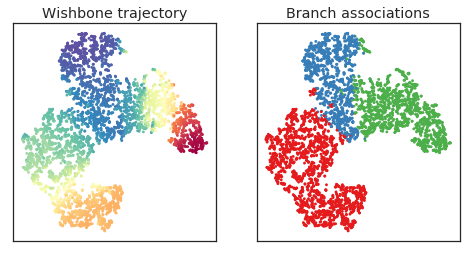

In [11]:
fig, ax = scanalysis.plots.wb_plot.plot_wishbone_on_tsne(w, d)

In [21]:
w.trajectory.index

Index(['W29956', 'W30018', 'W30161', 'W30203', 'W30258', 'W30296', 'W30301',
       'W30306', 'W31106', 'W31108',
       ...
       'W76151', 'W76159', 'W76160', 'W76170', 'W76185', 'W76187', 'W76226',
       'W76255', 'W76282', 'W76331'],
      dtype='object', length=4423)

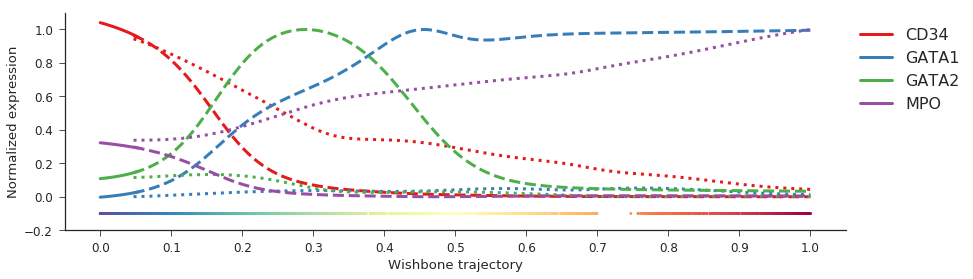

In [29]:
vals, fig, ax = scanalysis.plots.wb_plot.plot_marker_trajectory(scdata.data, w, ['CD34', 'GATA1', 'GATA2', 'MPO']);

In [33]:
vals

{'Branch1':             x      CD34     GATA1     GATA2       MPO
 0    0.046980  0.944413  0.000502  0.114869  0.337521
 1    0.053691  0.934548  0.001070  0.115580  0.337822
 2    0.060403  0.924699  0.001399  0.115922  0.338474
 3    0.067114  0.913253  0.002689  0.117588  0.338714
 4    0.073826  0.901495  0.003995  0.119261  0.339191
 5    0.080537  0.889433  0.005316  0.120928  0.339934
 6    0.087248  0.877075  0.006647  0.122572  0.340973
 7    0.093960  0.864430  0.007988  0.124174  0.342337
 8    0.100671  0.851509  0.009336  0.125716  0.344055
 9    0.107383  0.838324  0.010687  0.127174  0.346153
 10   0.114094  0.824885  0.012039  0.128528  0.348655
 11   0.120805  0.811207  0.013390  0.129751  0.351582
 12   0.127517  0.797303  0.014737  0.130818  0.354952
 13   0.134228  0.783189  0.016076  0.131701  0.358778
 14   0.140940  0.768882  0.017404  0.132374  0.363069
 15   0.147651  0.754401  0.018719  0.132807  0.367828
 16   0.154362  0.739766  0.020015  0.132973  0.373052

(<matplotlib.figure.Figure at 0x1127755f8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1121dd0f0>)

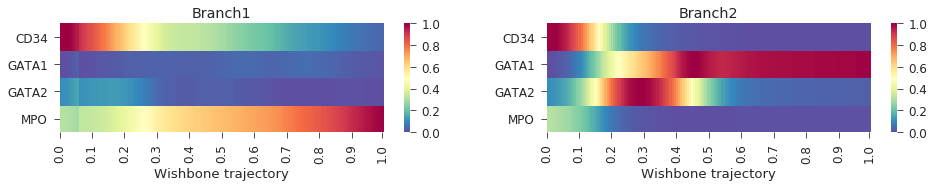

In [34]:
scanalysis.plots.wb_plot.plot_marker_heatmap(w, vals)

(<matplotlib.figure.Figure at 0x10fe41128>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10f2a9b70>)

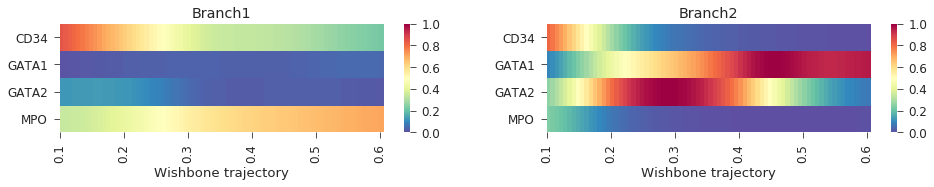

In [35]:
scanalysis.plots.wb_plot.plot_marker_heatmap(w, vals, trajectory_range=[0.1, 0.6])

(<matplotlib.figure.Figure at 0x11144cc50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10e1a92b0>)

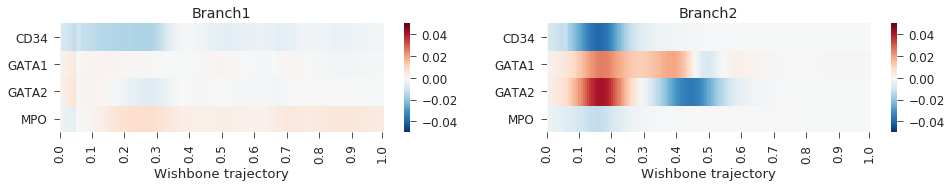

In [36]:
scanalysis.plots.wb_plot.plot_derivatives(w, vals)

(<matplotlib.figure.Figure at 0x10e4cee48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10ebc2a90>)

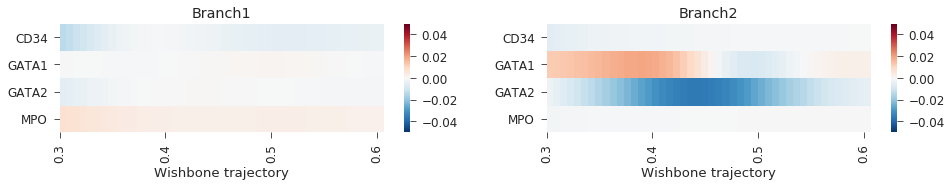

In [37]:
scanalysis.plots.wb_plot.plot_derivatives(w, vals, trajectory_range=[0.3, 0.6])

Please make sure that the tSNE data entered corresponds to the Wishbone object you've entered.
    If yes, press enter to continue.
    If not, Ctrl-C to exit and retry with correct parameters.


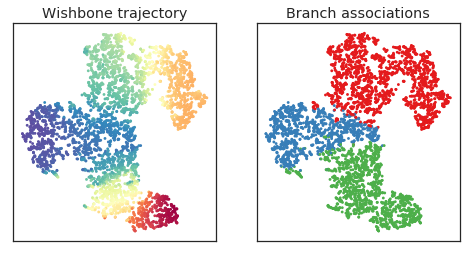

In [40]:
fig, ax = scanalysis.plots.wb_plot.plot_wishbone_on_tsne(w, scdata.tsne)

In [23]:
wb = wishbone.wb.Wishbone(scdata)

In [24]:
#scdata.data.index[100]
wb.run_wishbone('W30258')

Building lNN graph...
lNN computed in : 0.03 seconds
Determining waypoints if not specified...
Determining shortest path distances and perspectives....
..........................................................................................................................................................................................................................................................
Time for determining distances and perspectives: 92.32 seconds
Determining branch point and branch associations...
Running iterations...
Iteration: 2
Correlation with previous iteration:  0.9992
Iteration: 3
Correlation with previous iteration:  0.9999
2 realignment iterations


In [39]:
scdata.run_tsne(n_components=5, perplexity=30)

In [ ]:
fig, ax = wb.plot_wishbone_on_tsne()

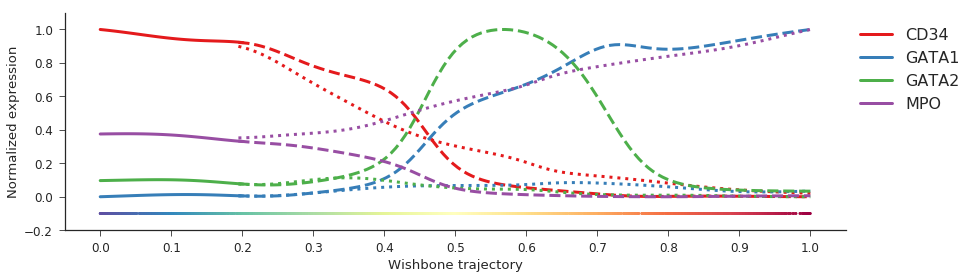

In [25]:
vals, fig, ax = wb.plot_marker_trajectory(['CD34', 'GATA1', 'GATA2', 'MPO']);

(<matplotlib.figure.Figure at 0x10f245dd8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x112627828>)

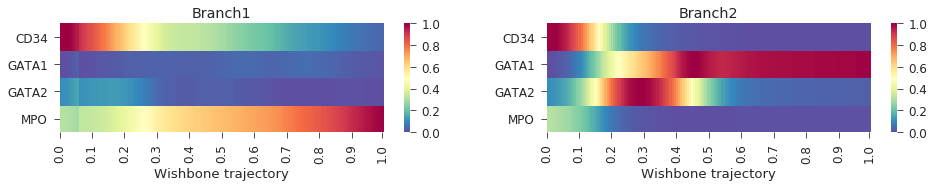

In [32]:
wb.plot_marker_heatmap(vals)

In [ ]:
x = 1

In [ ]:
y = deepcopy(x)

In [ ]:
x = 2

In [ ]:
y

In [ ]:
wb.branch

In [ ]:
wb.waypoints

In [ ]:
list(temp.index[w.waypoints])

In [28]:
scdata.data.ix[w.trajectory.index, 'CD34']

W29956    1.189415
W30018    1.302822
W30161    0.000000
W30203    1.554140
W30258    2.539777
W30296    0.000000
W30301    0.000000
W30306    0.000000
W31106    1.984508
W31108    0.000000
W31110    1.188587
W31117    0.000000
W31118    0.000000
W31119    1.716583
W31129    0.000000
W31130    0.000000
W31131    0.000000
W31141    1.222620
W31145    0.000000
W31148    0.000000
W31152    0.870097
W31157    0.000000
W31158    0.000000
W31160    0.000000
W31164    1.505509
W31166    0.957399
W31168    0.397117
W31169    2.066546
W31170    0.952859
W31174    0.000000
            ...   
W75961    0.000000
W75964    2.013360
W75965    0.000000
W75966    0.000000
W75968    0.000000
W75969    0.000000
W75974    0.000000
W75977    0.000000
W75993    0.000000
W75996    5.152338
W76001    3.088608
W76042    0.552930
W76054    2.095706
W76062    0.000000
W76063    2.461095
W76070    0.000000
W76071    3.351210
W76089    0.575666
W76149    0.409004
W76150    0.302891
W76151    0.547524
W76159    1.